Data setup (Task 1)

In [29]:
import pandas as pd

# Dataset
data = {
    'Age': [25, 35, 45, 20, 50, 40, 23, 48, 33, 52, 28, 37, 42, 31, 55, 
            29, 44, 38, 27, 51, 36, 43, 22, 47, 34, 49, 30, 41, 39, 46,
            58, 26, 47, 32, 53, 24, 46, 30, 50, 41, 21, 56, 35, 49, 28, 
            55, 40, 33, 59, 27, 44, 38, 60, 23, 52, 37, 45, 31, 54, 39],
    'Income': [40, 50, 65, 30, 70, 60, 35, 63, 48, 80, 45, 55, 68, 42, 75,
               38, 67, 58, 36, 72, 52, 64, 33, 69, 51, 71, 43, 62, 59, 66,
               78, 41, 65, 47, 82, 34, 61, 46, 70, 58, 32, 85, 50, 69, 43, 
               76, 55, 48, 81, 39, 66, 53, 84, 36, 73, 51, 67, 44, 75, 56],
    'Buy': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
            'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
            'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
            'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 
            'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 
            'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)
df.head()

,Age,Income,Buy
0,25,40,No
1,35,50,No
2,45,65,Yes
3,20,30,No
4,50,70,Yes


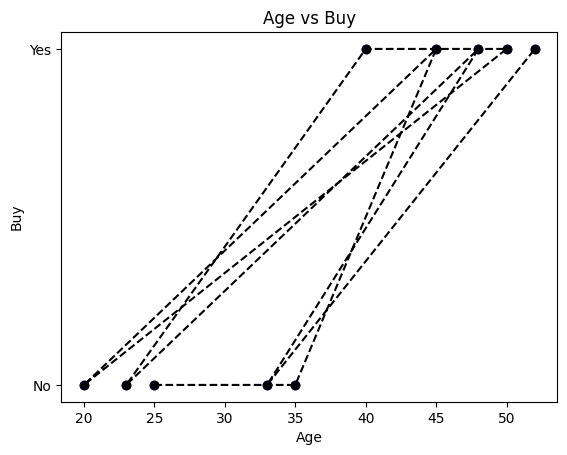

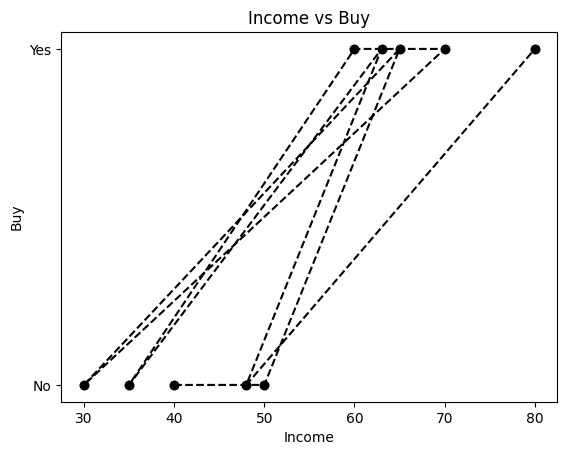

In [11]:
#plotting
import matplotlib.pyplot as plt

# with feature 'Age'
plt.scatter(df['Age'],df['Buy'], color='blue')
plt.plot(df['Age'],df['Buy'], color='Black', linestyle='--', marker='o')
plt.xlabel('Age')
plt.ylabel('Buy')
plt.title('Age vs Buy')
plt.show()

# with feature 'Income'
plt.scatter(df['Income'],df['Buy'], color='green')  
plt.plot(df['Income'],df['Buy'], color='Black', linestyle='--', marker='o')
plt.xlabel('Income')
plt.ylabel('Buy')
plt.title('Income vs Buy')
plt.show()


Distances (task 2)

In [30]:
import numpy as np

def euclidean_distance(p1,p2):
    return np.sqrt(np.square(p1[0]-p2[0]) + np.square(p1[1]-p2[1]))

def manhathan_distance(p1,p2):
    return np.abs((p1[0]-p2[0]) + (p1[1]-p2[1]))

def Minkowski_distance(p1,p2,p):
    return (np.power(np.abs(p1[0]-p2[0]), p) + np.power(np.abs(p1[1]-p2[1]), p))**(1/p)

Training model (Task 3)

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
le = LabelEncoder()

df['Buy'] = le.fit_transform(df['Buy'])

X = df[['Age', 'Income']]
y = df['Buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN model on test Data: {accuracy*100:.2f}%')

Accuracy of KNN model: 100.00%


Range of K values (Task 4)

In [33]:
k_values = range(1,11)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Euclidean Accuracy: {accuracy*100:.2f}%')

    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric=manhathan_distance)
    knn_manhattan.fit(X_train, y_train) 
    y_pred_manhattan = knn_manhattan.predict(X_test)
    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)   
    print(f'Manhattan Accuracy: {accuracy_manhattan * 100:.2f}%')

    knn_minkowski = KNeighborsClassifier(n_neighbors=k, metric=lambda a, b: Minkowski_distance(a, b, 3))
    knn_minkowski.fit(X_train, y_train)
    y_pred_minkowski = knn_minkowski.predict(X_test)
    accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)
    print(f'Minkowski Accuracy: {accuracy_minkowski * 100:.2f}%')

Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 100.00%
Euclidean Accuracy: 94.44%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 94.44%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 100.00%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 100.00%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 100.00%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 100.00%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 100.00%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 94.44%
Euclidean Accuracy: 100.00%
Manhattan Accuracy: 100.00%
Minkowski Accuracy: 94.44%
Euclidean Accuracy: 94.44%
Manhattan Accuracy: 94.44%
Minkowski Accuracy: 94.44%


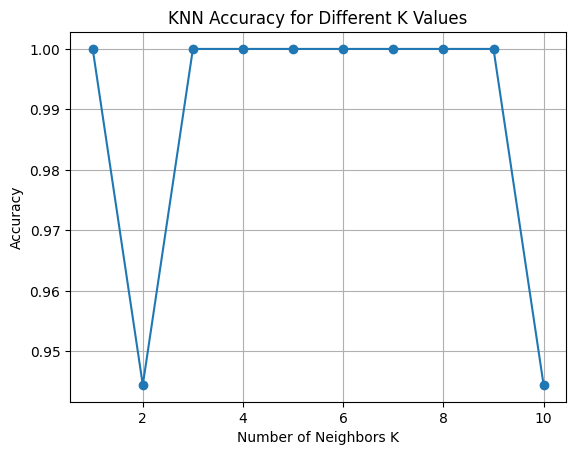

In [34]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid()
plt.show()

Different Algorithms (Task 5)

In [38]:
import time

In [40]:
knn_brute = KNeighborsClassifier(n_neighbors=4, algorithm='brute', metric='euclidean')
B_train_S_time = time.time()
knn_brute.fit(X_train, y_train)
B_train_E_time = time.time()
B_training_time = B_train_E_time - B_train_S_time

B_test_S_time = time.time()
y_pred_brute = knn_brute.predict(X_test)
B_test_E_time = time.time()
B_testing_time = B_test_E_time - B_test_S_time
accuracy_brute = accuracy_score(y_test, y_pred_brute)
print(f"Training Time : {B_training_time:.5f}s")
print(f"Testing Time : {B_testing_time:.5f}s")
print(f'Brute Force Algorithm Accuracy: {accuracy_brute * 100:.2f}%')

Training Time : 0.00899s
Testing Time : 0.01399s
Brute Force Algorithm Accuracy: 100.00%


In [41]:
knn_kd_tree = KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree', metric='euclidean')

K_train_S_time = time.time()
knn_kd_tree.fit(X_train, y_train)
K_train_E_time = time.time()
K_training_time = K_train_E_time - K_train_S_time

K_test_S_time = time.time()
y_pred_kd_tree = knn_kd_tree.predict(X_test)
K_test_E_time = time.time()
K_testing_time = K_test_E_time - K_test_S_time


accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)

print(f"Training Time : {K_training_time:.5f}s")
print(f"Testing Time : {K_testing_time:.5f}s")
print(f'KD Tree Force Algorithm Accuracy: {accuracy_kd_tree * 100:.2f}%')

Training Time : 0.02199s
Testing Time : 0.05697s
KD Tree Force Algorithm Accuracy: 100.00%
